In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Pre_processed_Placement.csv")

In [3]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [5]:
dataset=dataset.astype(int)

In [6]:
dataset.columns

Index(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary',
       'gender_M', 'ssc_b_Others', 'hsc_b_Others', 'hsc_s_Commerce',
       'hsc_s_Science', 'degree_t_Others', 'degree_t_Sci&Tech', 'workex_Yes',
       'specialisation_Mkt&HR', 'status_Placed'],
      dtype='object')

In [7]:
independent=dataset[['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p','gender_M', 'ssc_b_Others', 'hsc_b_Others', 'hsc_s_Commerce',
       'hsc_s_Science', 'degree_t_Others', 'degree_t_Sci&Tech', 'workex_Yes',
       'specialisation_Mkt&HR', 'status_Placed']]
dependent=dataset[['salary']]

In [8]:
from sklearn.model_selection import train_test_split #sklearn is a library used for handling ML algorithm
X_train,X_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

# PRINCIPAL COMPONENT ANALYSIS

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [10]:
from sklearn.decomposition import PCA
pca = PCA()  # Choose number of components based on explained variance
X_pca = pca.fit_transform(X_train)

In [11]:
from sklearn.linear_model import Ridge
regressor=Ridge(alpha=0.25,solver='auto')
regressor=regressor.fit(X_train,y_train)

In [12]:
y_predict=regressor.predict(X_test)

In [13]:
from sklearn.metrics import r2_score,mean_squared_error #finding r2 value 
r_score=r2_score(y_test,y_predict)
mse = mean_squared_error(y_test, y_predict)

In [14]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r_score}")

Mean Squared Error: 3232815672.658245
R^2 Score: 0.8059338272056609


In [15]:
r_score

0.8059338272056609

In [16]:
print(pca.explained_variance_ratio_)

[0.20375502 0.15835064 0.10134497 0.08025629 0.07196321 0.06976795
 0.06122736 0.05408003 0.04625682 0.0371057  0.03065342 0.02887605
 0.02425574 0.01643373 0.01185178 0.00382128]


In [17]:
dataset.isnull().sum()

sl_no                    0
ssc_p                    0
hsc_p                    0
degree_p                 0
etest_p                  0
mba_p                    0
salary                   0
gender_M                 0
ssc_b_Others             0
hsc_b_Others             0
hsc_s_Commerce           0
hsc_s_Science            0
degree_t_Others          0
degree_t_Sci&Tech        0
workex_Yes               0
specialisation_Mkt&HR    0
status_Placed            0
dtype: int64

In [18]:
dataset.drop("sl_no",inplace=True,axis=1)

In [19]:
dataset

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,67,91,58,55,58,270000,1,1,1,1,0,0,1,0,1,1
1,79,78,77,86,66,200000,1,0,1,0,1,0,1,1,0,1
2,65,68,64,75,57,250000,1,0,0,0,0,0,0,0,0,1
3,56,52,52,66,59,0,1,0,0,0,1,0,1,0,1,0
4,85,73,73,96,55,425000,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80,82,77,91,74,400000,1,1,1,1,0,0,0,0,0,1
211,58,60,72,74,53,275000,1,1,1,0,1,0,1,0,0,1
212,67,67,73,59,69,295000,1,1,1,1,0,0,0,1,0,1
213,74,66,58,70,60,204000,0,1,1,1,0,0,0,0,1,1


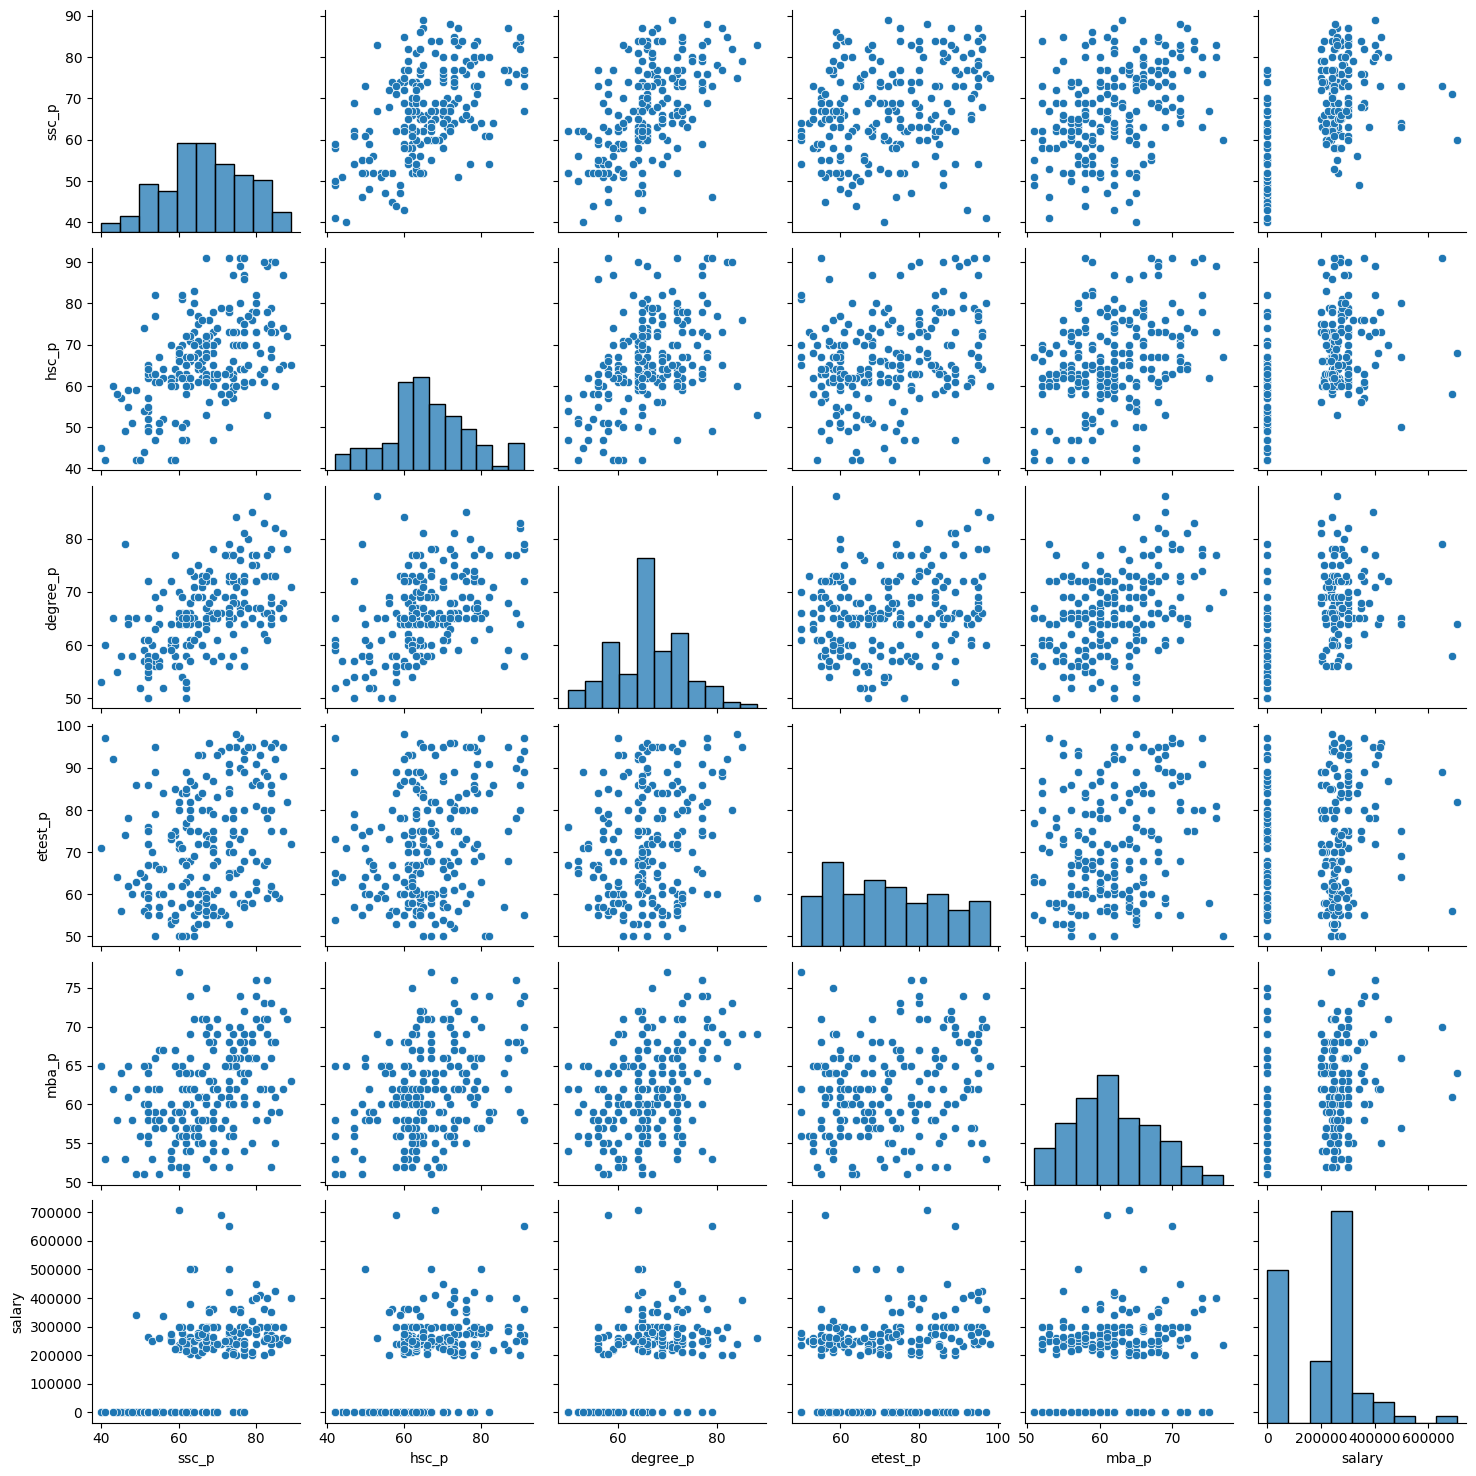

In [20]:
import seaborn as sns
sns.pairplot(dataset[['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']])

In [21]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca_with_const = sm.add_constant(df_pca)
vif_data = pd.DataFrame()
vif_data["Feature"] =df_pca.columns 
vif_data["VIF"] = [variance_inflation_factor(df_pca.values, i) for i in range(df_pca.shape[1])]
print(vif_data)

   Feature  VIF
0      PC1  1.0
1      PC2  1.0
2      PC3  1.0
3      PC4  1.0
4      PC5  1.0
5      PC6  1.0
6      PC7  1.0
7      PC8  1.0
8      PC9  1.0
9     PC10  1.0
10    PC11  1.0
11    PC12  1.0
12    PC13  1.0
13    PC14  1.0
14    PC15  1.0
15    PC16  1.0
